In [21]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [22]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type='variation.txt'):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                full_path = os.path.join(path, dir, type)    
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res[algo].append(num_list)
            
    return res

read_data()

{'cm': [[0,
   445,
   442,
   463,
   371,
   980,
   222,
   2400,
   314,
   773,
   340,
   1083,
   11042,
   2438,
   2184,
   4302,
   727,
   4133,
   760,
   1127,
   0],
  [0,
   3014,
   2344,
   3226,
   2752,
   2594,
   2429,
   3429,
   3237,
   3136,
   3035,
   21,
   18,
   18,
   12,
   10,
   7,
   3,
   2,
   2,
   0],
  [0,
   667,
   196,
   356,
   75,
   337,
   242,
   225,
   356,
   208,
   334,
   1713,
   1494,
   1347,
   1994,
   1504,
   1512,
   1794,
   1437,
   1409,
   0],
  [0,
   205,
   358,
   495,
   323,
   349,
   571,
   569,
   1066,
   596,
   390,
   831,
   1067,
   634,
   579,
   975,
   1604,
   1438,
   2281,
   1148,
   0],
  [0,
   35,
   33,
   35,
   23,
   21,
   28,
   24,
   24,
   23,
   29,
   411,
   831,
   3790,
   2455,
   622,
   3438,
   1499,
   424,
   958,
   0],
  [0,
   1473,
   375,
   2271,
   335,
   1469,
   1513,
   2937,
   1068,
   1387,
   981,
   3,
   2,
   2,
   4,
   1,
   3,
   2,
   2,
   0,
   0],
 

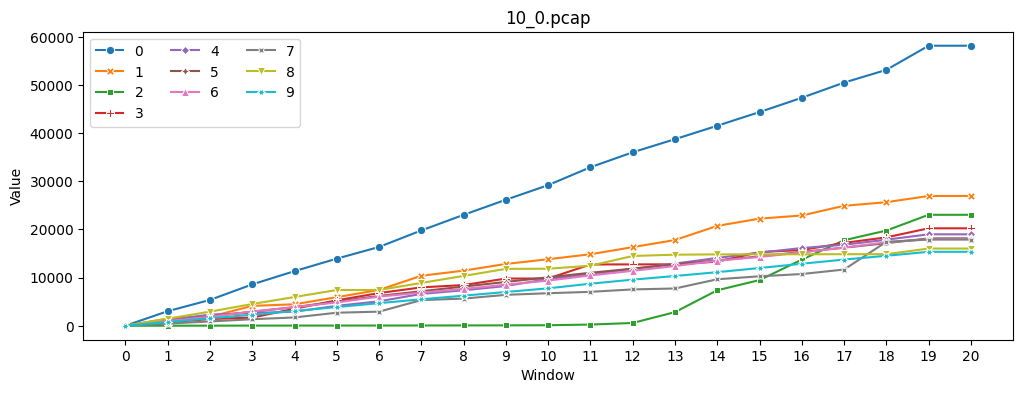

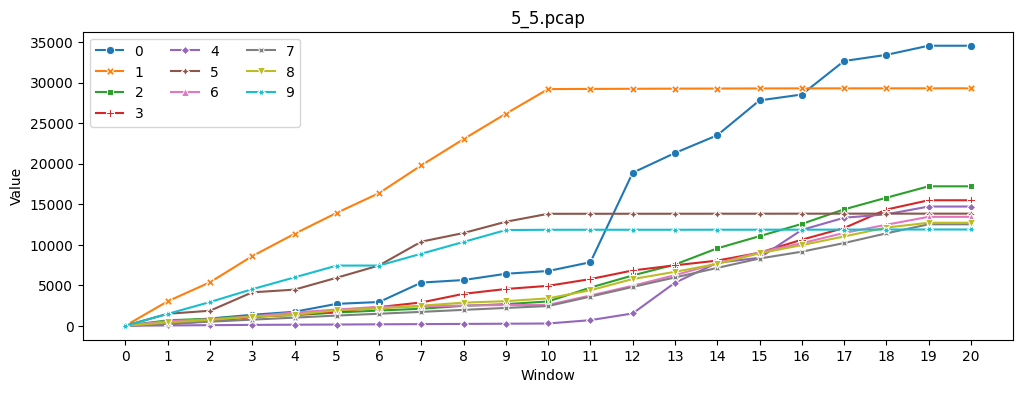

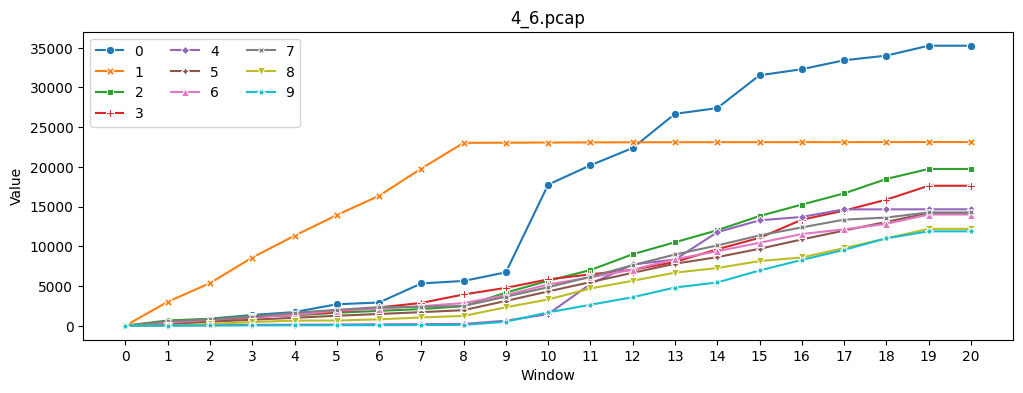

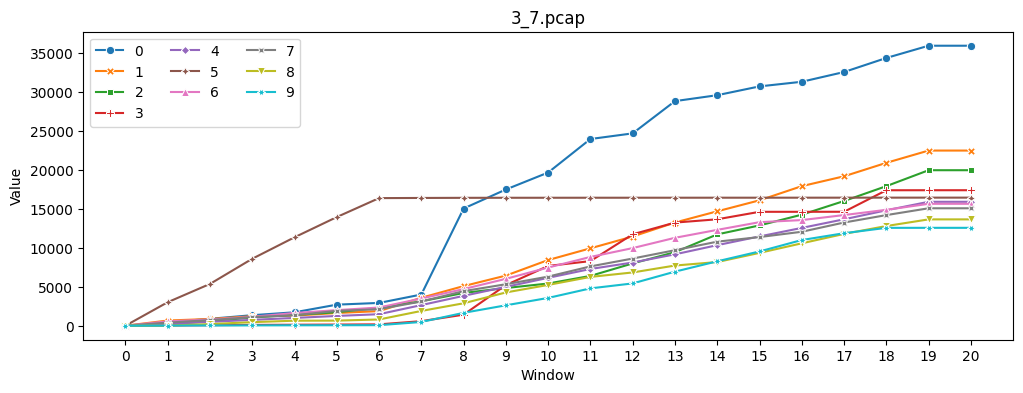

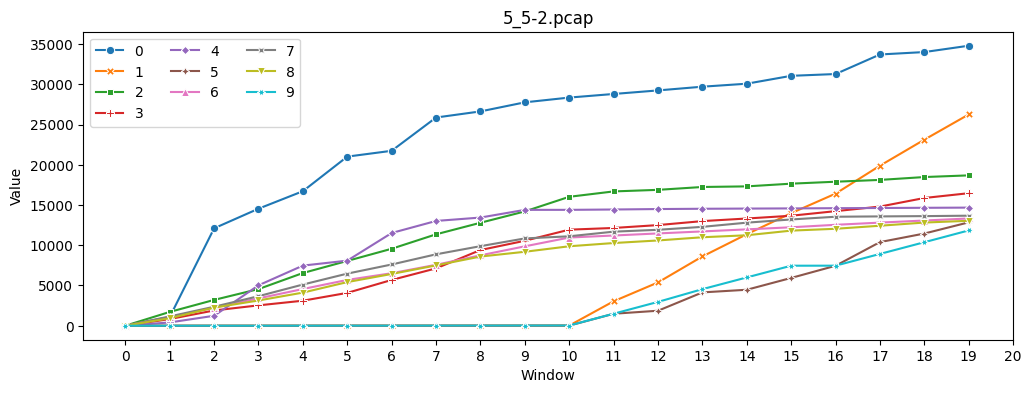

In [23]:
def plot_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="accumulate.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    # plt.axhline(10000, c="black")
    plt.xticks([i for i in range(21)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_accumulate(dataset='10_0.pcap/')
plot_accumulate(dataset='5_5.pcap/')
plot_accumulate(dataset='4_6.pcap/')
plot_accumulate(dataset='3_7.pcap/')

plot_accumulate(dataset='5_5-2.pcap/')

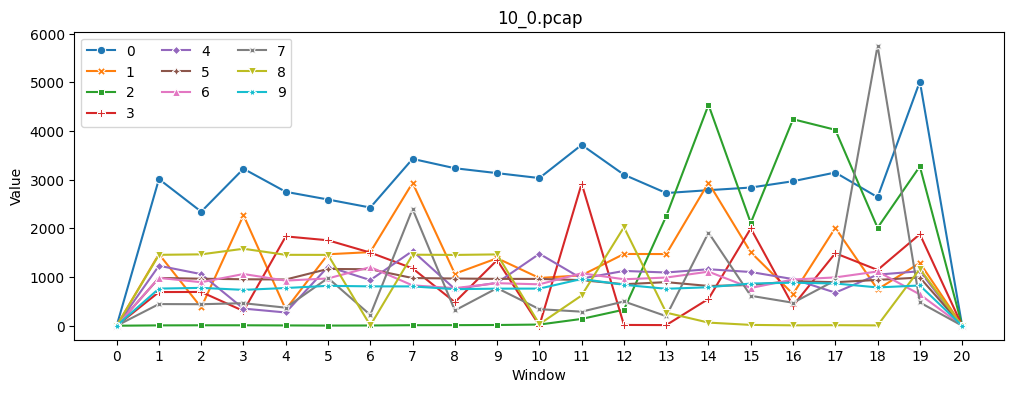

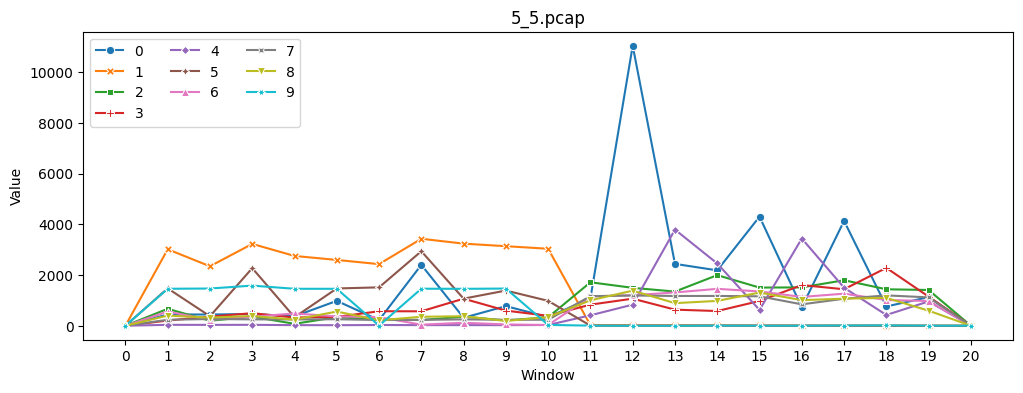

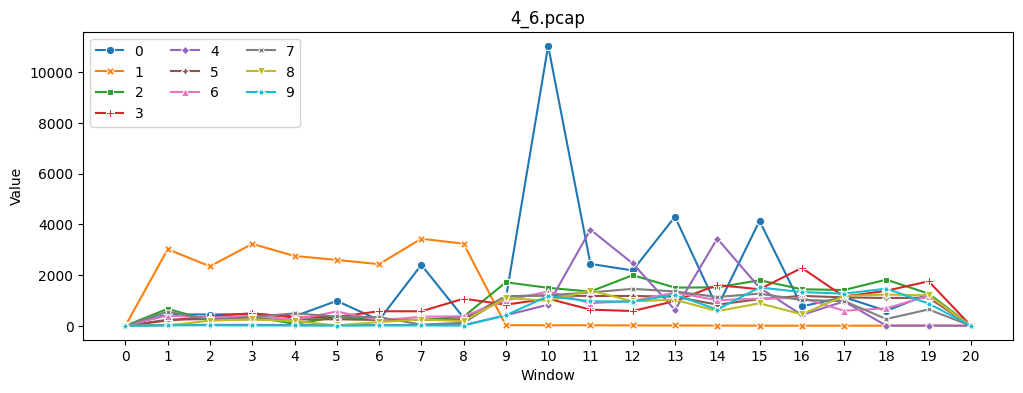

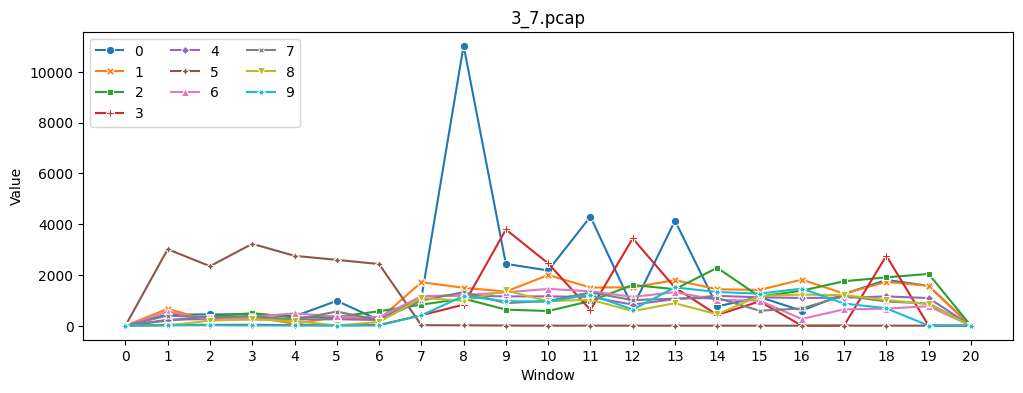

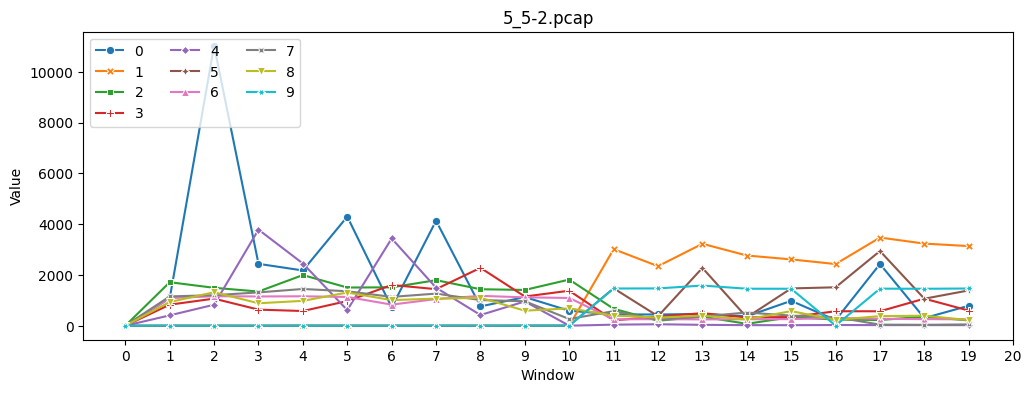

In [24]:
def plot_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="variation.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    plt.xticks([i for i in range(21)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_variation(dataset='10_0.pcap/')
plot_variation(dataset='5_5.pcap/')
plot_variation(dataset='4_6.pcap/')
plot_variation(dataset='3_7.pcap/')

plot_variation(dataset='5_5-2.pcap/')

[5019, 1936, 3275, 2917, 1233, 991, 983, 5277, 1756, 827]


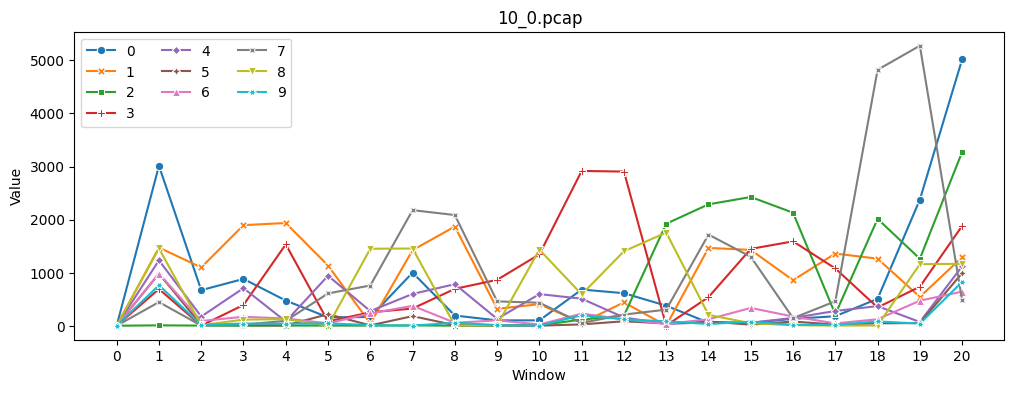

[9959, 3014, 1409, 1148, 2959, 1936, 1128, 1118, 662, 1457]


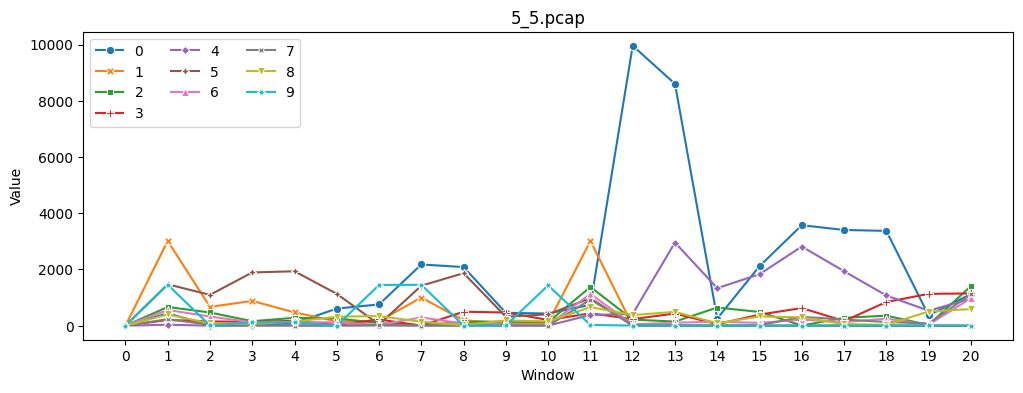

[9959, 3216, 1357, 1752, 2959, 1103, 1183, 1038, 1204, 875]


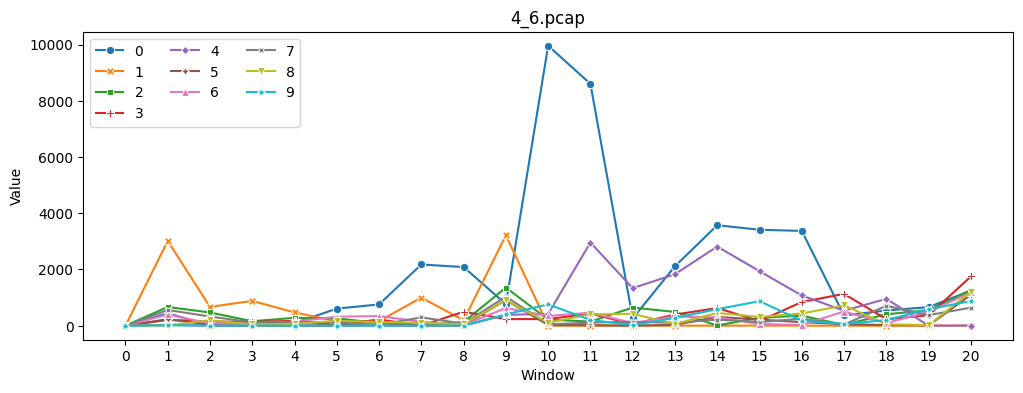

[9950, 1573, 2042, 2959, 1090, 3014, 817, 875, 948, 872]


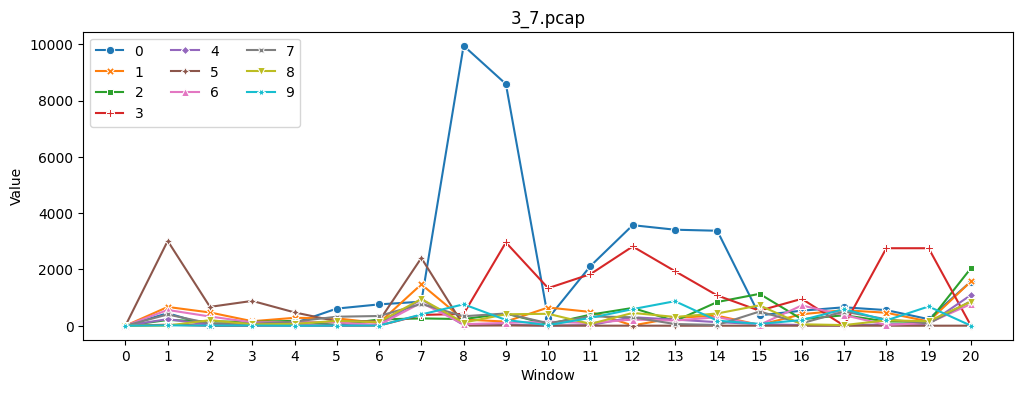

In [25]:
def plot_second_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="second_variation.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]
    
    vote = [max(item) for item in res]
    print(vote)

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    plt.xticks([i for i in range(21)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_second_variation(dataset='10_0.pcap/')
plot_second_variation(dataset='5_5.pcap/')
plot_second_variation(dataset='4_6.pcap/')
plot_second_variation(dataset='3_7.pcap/')